#  Diabetes prediction using KNN classfier

Successfully Imported 
Numpy as np
Pandas as pd
Matplotlib.pyplot as plt
SKlearn as s
Seaborn as sns
************************************

Dataset Loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None
Demo of Dataset
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insuli

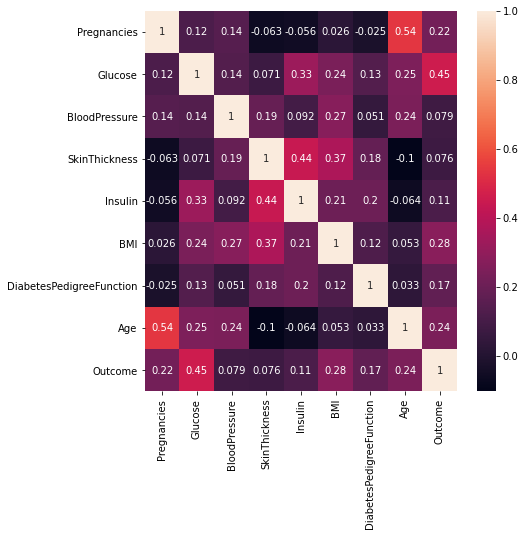


Barplot of missing Data


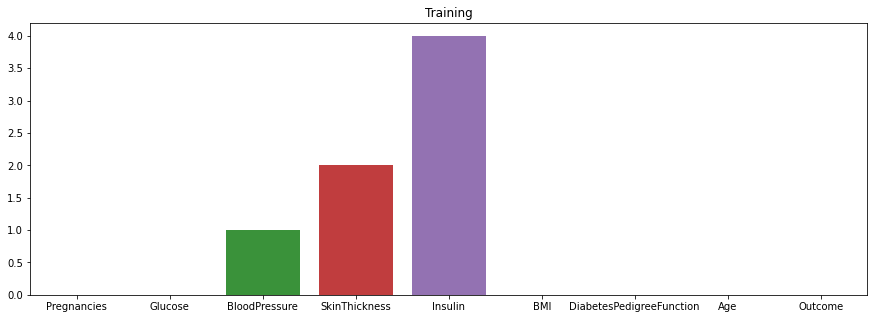

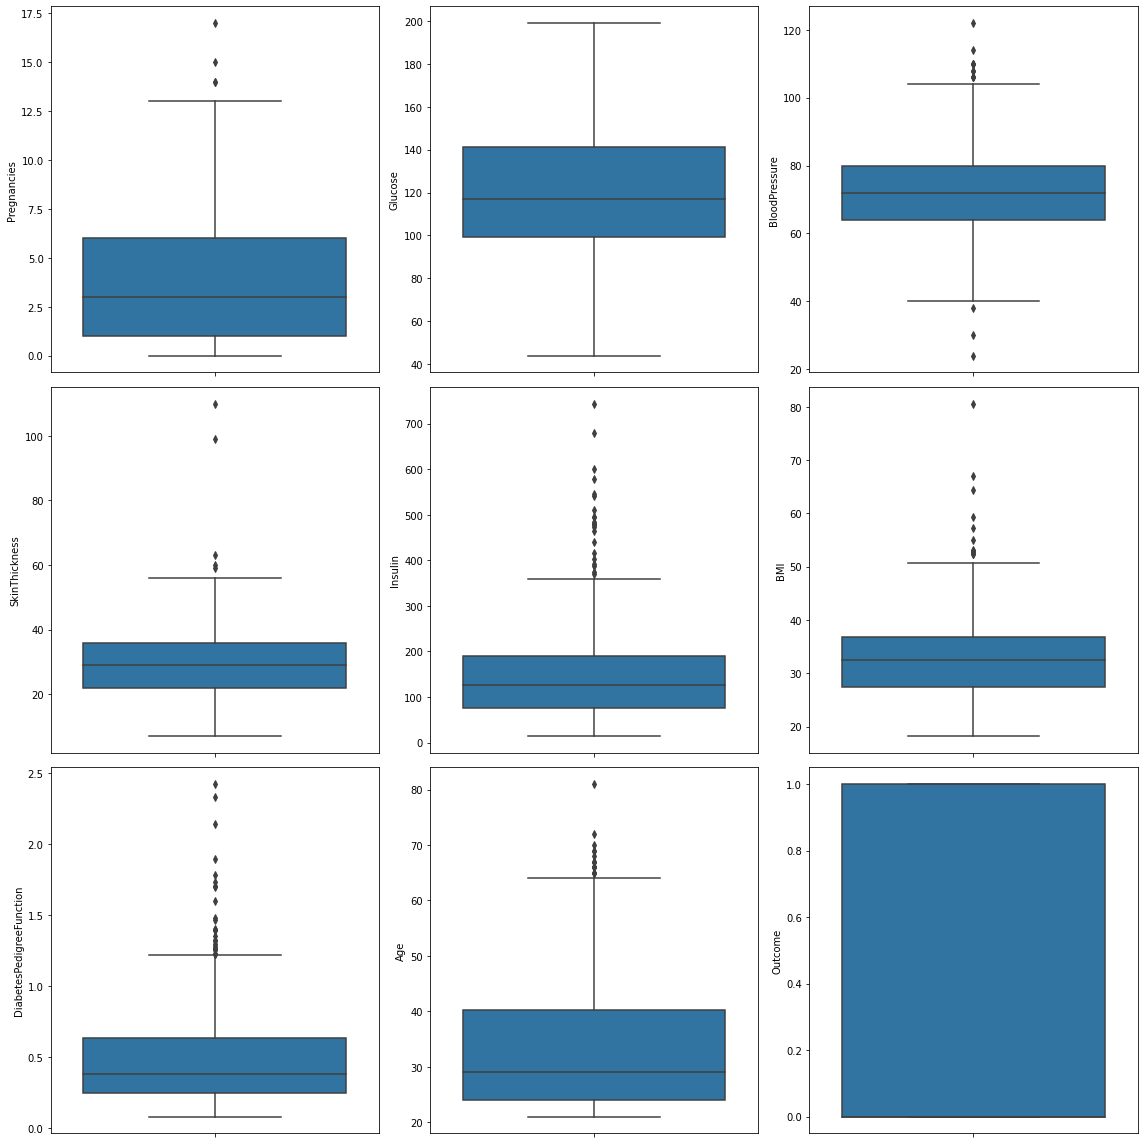

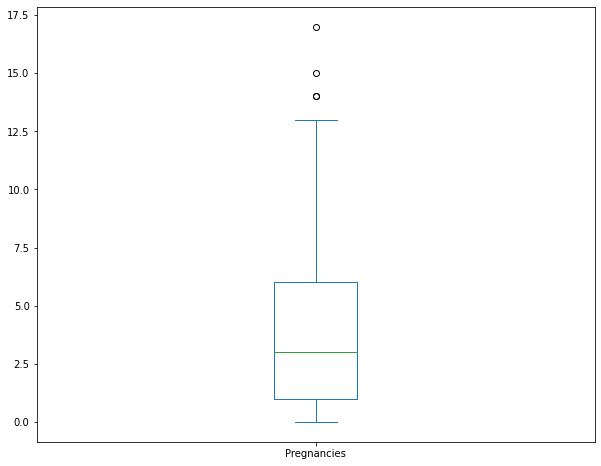

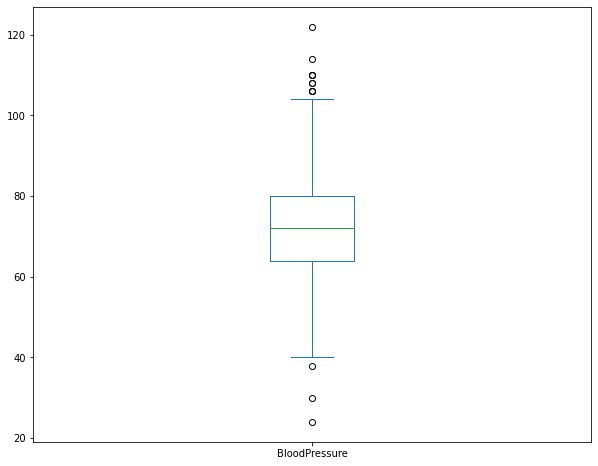

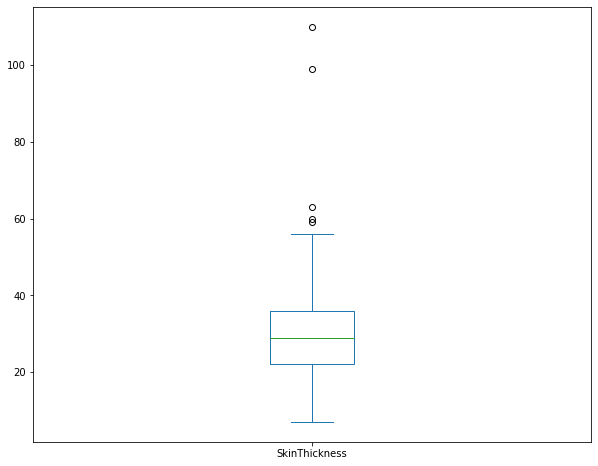

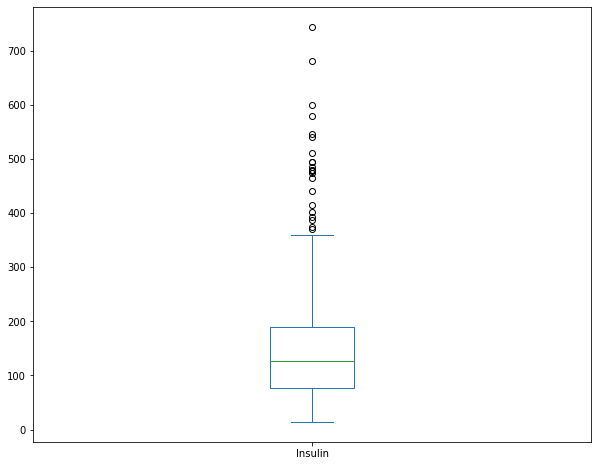

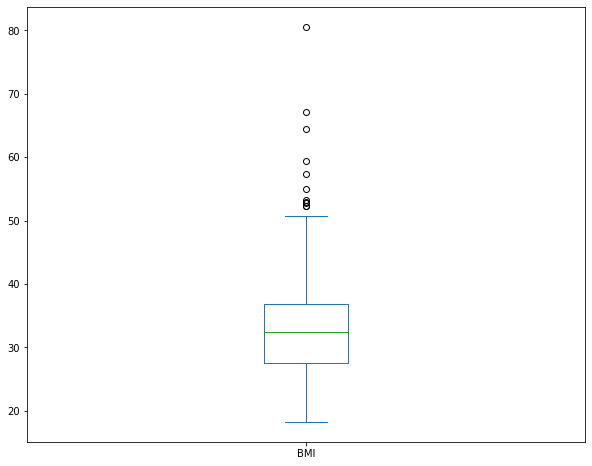

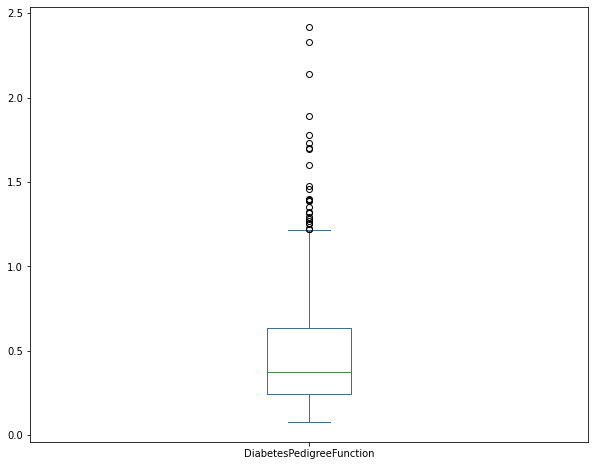

Pregnancies                   4
Glucose                       5
BloodPressure                37
SkinThickness               217
Insulin                     366
BMI                          13
DiabetesPedigreeFunction      3
Age                           0
Outcome                       0
dtype: int64
Pregnancies


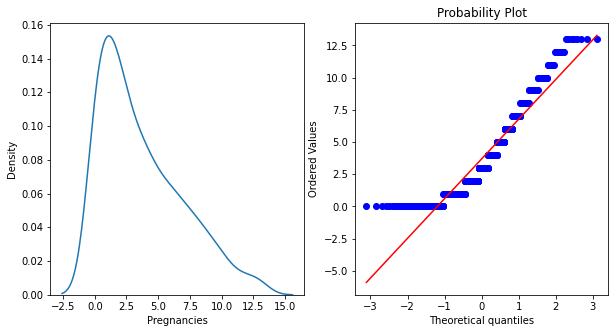

Glucose


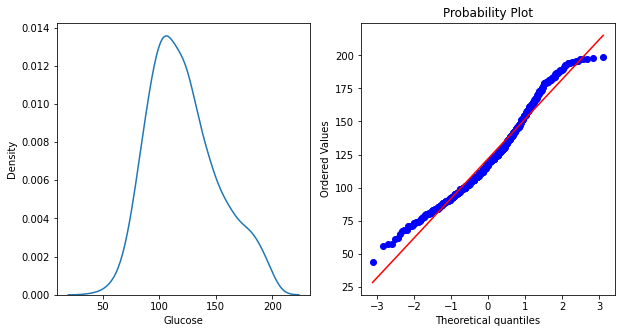

BloodPressure


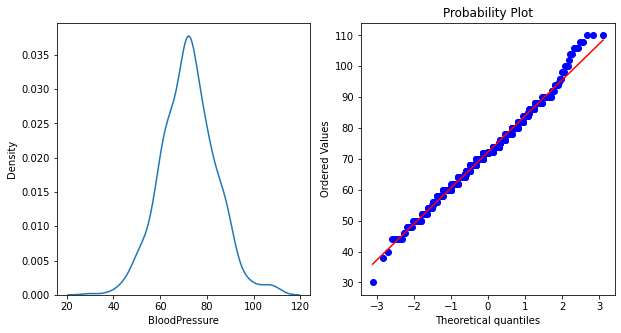

SkinThickness


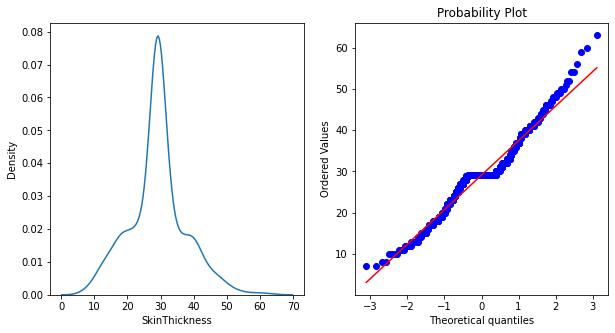

Insulin


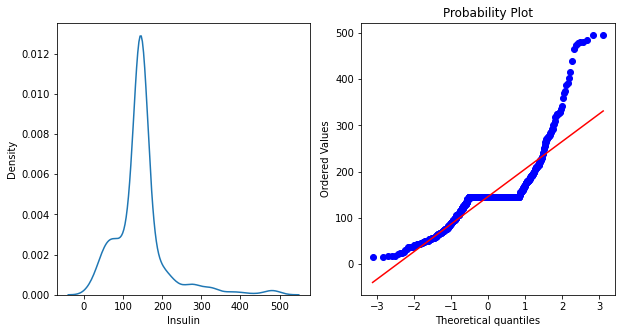

BMI


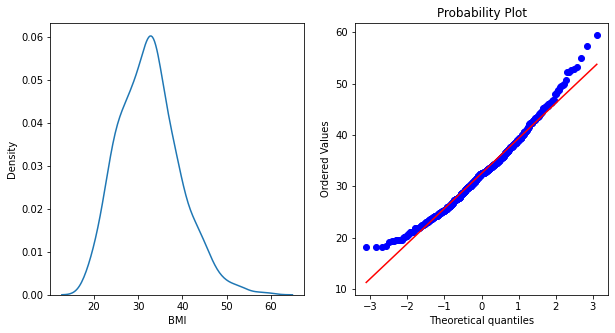

DiabetesPedigreeFunction


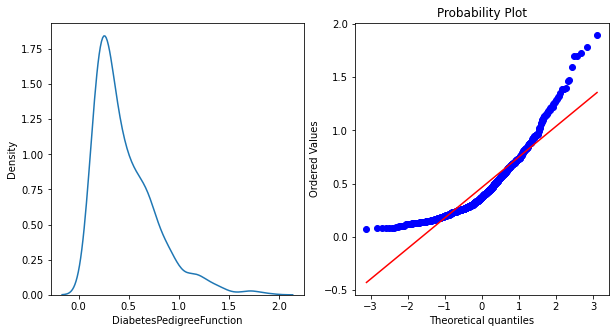

Age


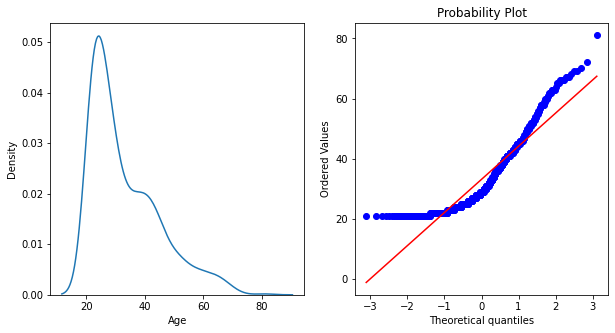

Outcome


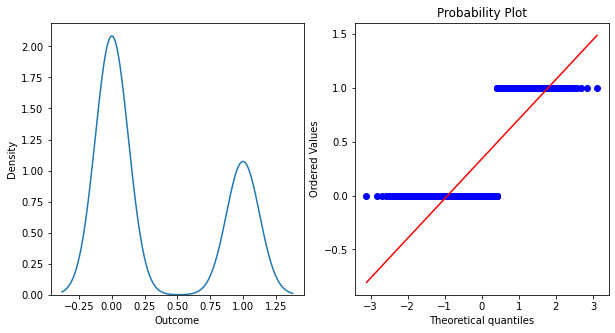

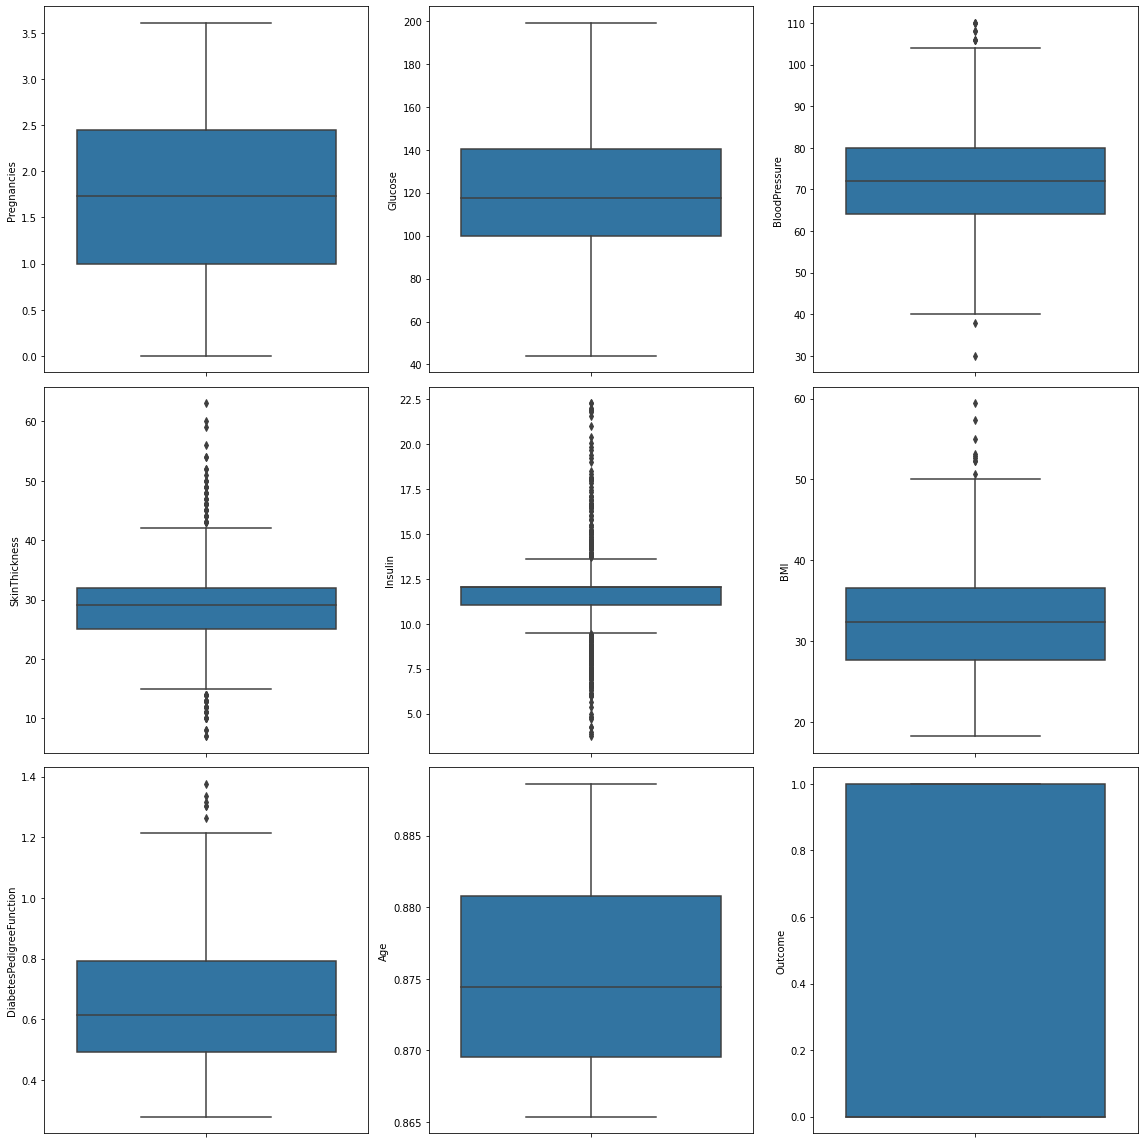

Pregnancies


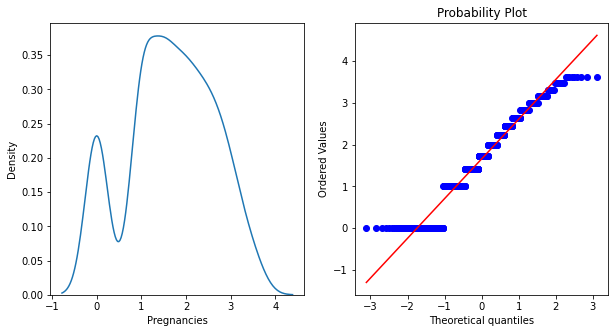

Glucose


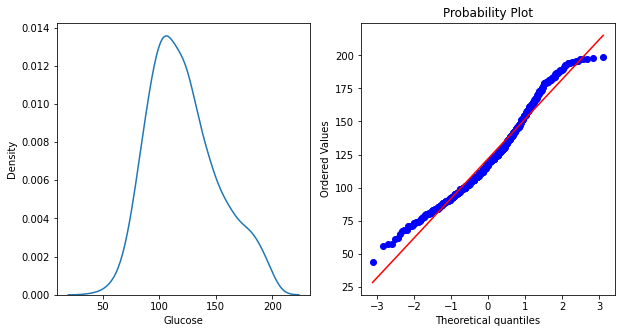

BloodPressure


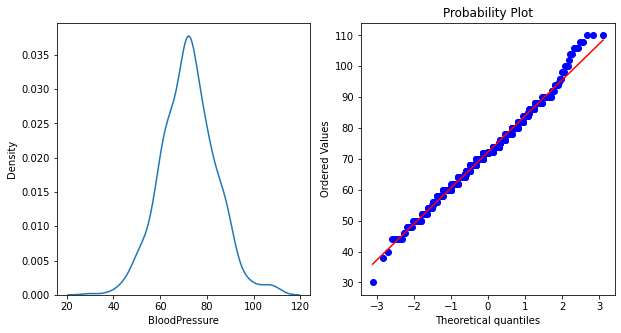

SkinThickness


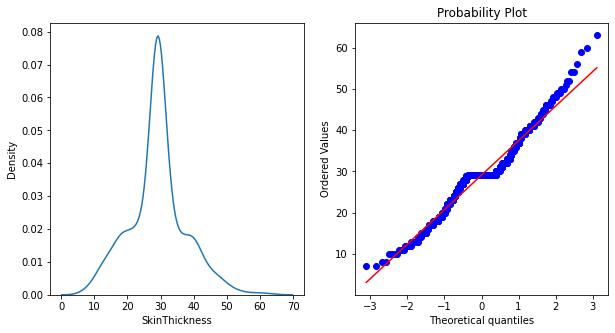

Insulin


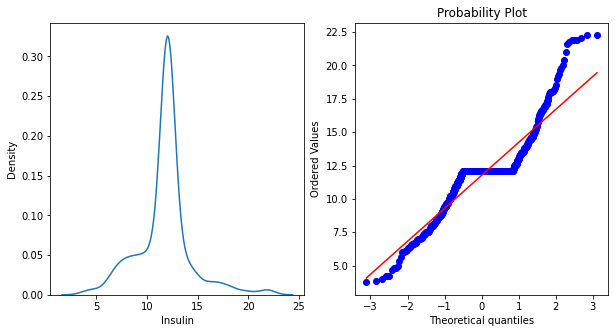

BMI


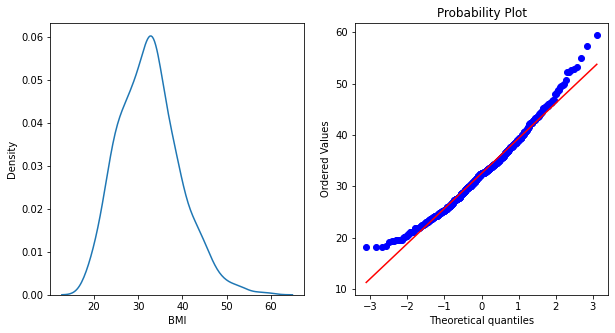

DiabetesPedigreeFunction


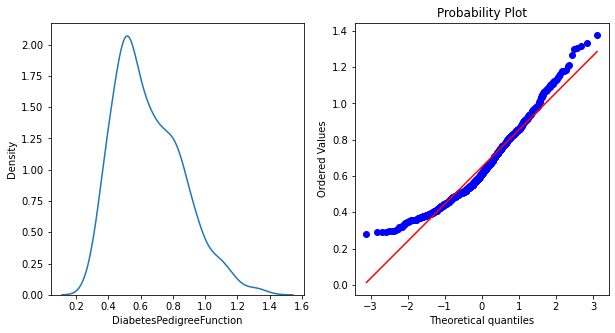

Age


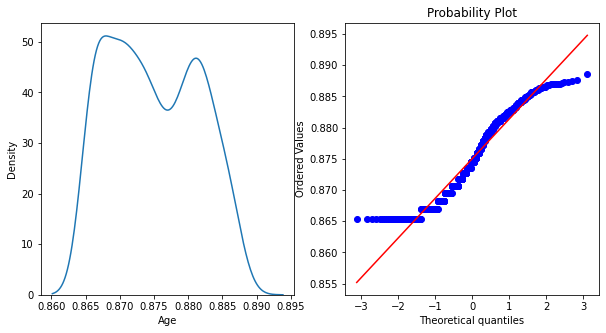

N1


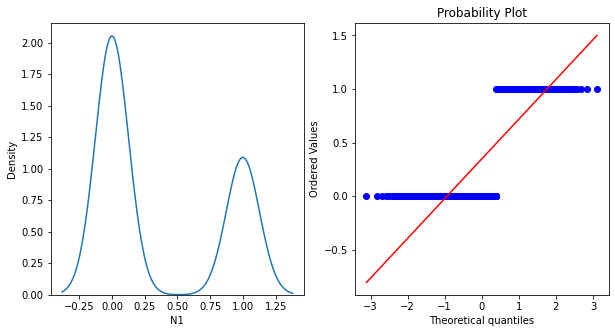

N2


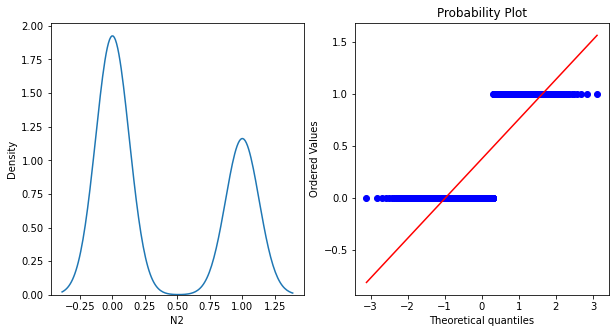

N3


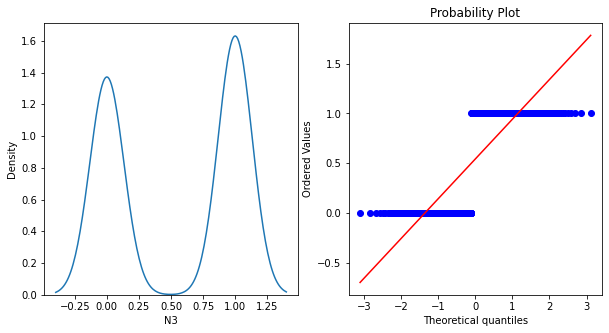

N4


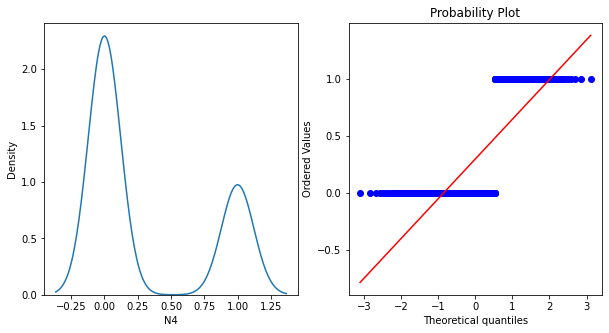

N6


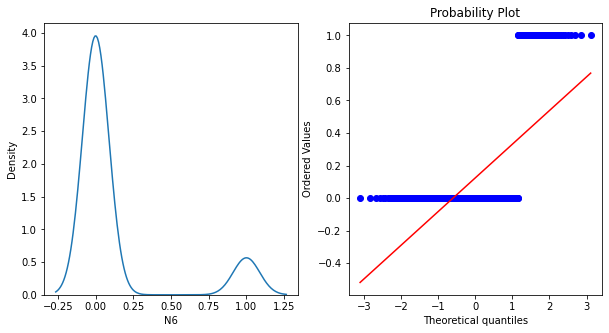

N7


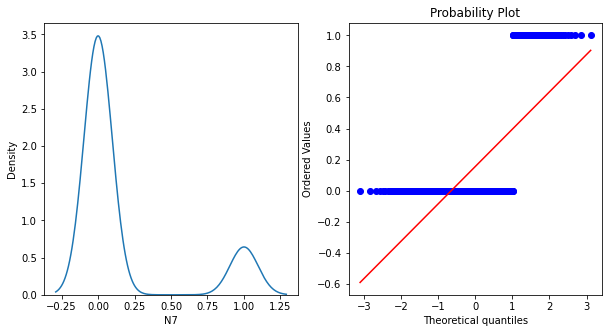

Outcome


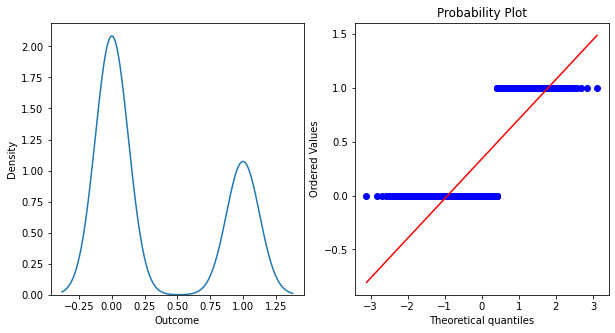

Dataset after deal with missing values returned as X (input)and Y(Outcome) (without normalization)
Dataset after deal with missing values returned as Norm_X (input) and Norm_Y (Outcome) (with normalization)


In [3]:
# Run this cell to get preprocessed data
%run Data_loader_and_preprocessed.ipynb

In [4]:
# splitting dataset into training and testing part
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
test_data_ratio=[0.3,0.25,0.2,0.15,0.1,0.05]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(Norm_X,Norm_Y,test_size=i,shuffle=True)
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.3
Best score for training data: 0.7442307692307691 

Best #neighbors: 4 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[136  22]
 [ 38  28]]


              precision    recall  f1-score   support

           0       0.78      0.86      0.82       158
           1       0.56      0.42      0.48        66

    accuracy                           0.73       224
   macro avg       0.67      0.64      0.65       224
weighted avg       0.72      0.73      0.72       224

Training set score for knn_model: 0.817308
Testing  set score for knn_model: 0.732143
******************End of iteration******************

******************Start of iteration******************

For ratio  0.25
Best score for training data: 0.7293597168597168 

Best #neighbors: 3 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[102  20]
 [ 26  38]]


              precision    recall  f1-score   support

       